<a href="https://colab.research.google.com/github/jmlly/Algoritmos/blob/main/Aulas/Aula08-Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Exploratória de Dados

Para esta aula usaremos uma pesquisa recente nos EUA sobre o mercado de trabalho para programadores de
software.

Pesquisa Salarial realizada pelo site https://www.freecodecamp.com/ com programadores de software nos EUA
que frequentaram treinamentos Bootcamp.)

Importando os pacotes:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

Carregando o dataset

In [ ]:
dados=pd.read_csv('/content/Dados-Pesquisa.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Imprimir cabeçalho

In [ ]:
dados.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [ ]:
dados.shape

(15620, 113)

Visualizando todas as colunas

In [ ]:
dados.columns.to_list()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinorit

fazendo uma cópia

In [ ]:
df2 = dados.copy()

verificando quantos dados são nulos

In [ ]:
dados.isna().sum()

Age                      2007
AttendedBootcamp          240
BootcampFinish          14687
BootcampFullJobAfter    14985
BootcampLoanYesNo       14686
                        ...  
ResourceW3Schools       15499
ResourceYouTube         15499
SchoolDegree             1941
SchoolMajor              7170
StudentDebtOwe          12106
Length: 113, dtype: int64

In [ ]:
dados.isna().sum().sum()

1183948

apagando os dados nulos da coluna idade (e consequentemente excluindo também as outras colunas dessa linha)

In [ ]:
dados.dropna(subset = ['Age'], inplace = True)

In [ ]:
dados.isna().sum()

Age                         0
AttendedBootcamp          112
BootcampFinish          12809
BootcampFullJobAfter    13068
BootcampLoanYesNo       12805
                        ...  
ResourceW3Schools       13508
ResourceYouTube         13506
SchoolDegree              113
SchoolMajor              5265
StudentDebtOwe          10121
Length: 113, dtype: int64

a média de dados nulos por colunas

In [ ]:
dados.isna().mean()

Age                     0.000000
AttendedBootcamp        0.008227
BootcampFinish          0.940939
BootcampFullJobAfter    0.959965
BootcampLoanYesNo       0.940645
                          ...   
ResourceW3Schools       0.992287
ResourceYouTube         0.992140
SchoolDegree            0.008301
SchoolMajor             0.386763
StudentDebtOwe          0.743480
Length: 113, dtype: float64

In [ ]:
print('A base de dados apresenta {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

A base de dados apresenta 13613 linhas e 113 colunas


In [ ]:
dados.dtypes.value_counts()

float64    85
object     28
dtype: int64

Criando um novo Data Frame apenas com as colunas que queremos:

In [ ]:
dados = dados[['Age','Gender','JobPref','JobRoleInterest','EmploymentField','JobRelocateYesNo','HoursLearning','MoneyForLearning']]
dados

,Age,Gender,JobPref,JobRoleInterest,EmploymentField,JobRelocateYesNo,HoursLearning,MoneyForLearning
0,28.0,male,freelance,NaN,office and administrative support,NaN,30.0,0.0
1,22.0,male,work for a startup,Front-End Web Developer,food and beverage,1.0,30.0,20.0
2,19.0,male,start your own business,NaN,finance,NaN,20.0,50.0
3,26.0,female,work for a startup,Front-End Web Developer,"arts, entertainment, sports, or media",NaN,20.0,100.0
4,20.0,female,work for a medium-sized company,Full-Stack Web Developer,education,1.0,25.0,1300.0
...,...,...,...,...,...,...,...,...
15615,39.0,male,start your own business,NaN,software development and IT,NaN,40.0,0.0
15616,27.0,male,work for a startup,Front-End Web Developer,software development and IT,1.0,15.0,100.0
15617,37.0,male,freelance,NaN,NaN,NaN,14.0,0.0
15618,26.0,male,NaN,NaN,education,NaN,10.0,30.0


In [ ]:
dados = dados.drop_duplicates()

In [ ]:
dados.shape

(12234, 8)

Vamos ver um resumo estatístico do Dataset:

In [ ]:
dados.describe()

,Age,JobRelocateYesNo,HoursLearning,MoneyForLearning
count,12234.000000,4669.000000,11807.000000,11643.000000
mean,29.598823,0.733348,15.713814,1193.690114
std,9.215518,0.442256,14.548388,4999.765832
min,10.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,5.000000,0.000000
50%,28.000000,1.000000,10.000000,50.000000
75%,34.000000,1.000000,20.000000,400.000000
max,86.000000,1.000000,100.000000,180000.000000


In [ ]:
dados.describe(include = 'O')

,Gender,JobPref,JobRoleInterest,EmploymentField
count,12194,9320,5552,6683
unique,5,5,9,15
top,male,work for a medium-sized company,Full-Stack Web Developer,software development and IT
freq,9360,2841,2211,3473


usando o loc:

In [ ]:
dados.loc[dados['Age'] > 30] 

,Age,Gender,JobPref,JobRoleInterest,EmploymentField,JobRelocateYesNo,HoursLearning,MoneyForLearning
5,34.0,male,start your own business,NaN,finance,NaN,5.0,0.0
7,35.0,male,freelance,NaN,office and administrative support,NaN,NaN,0.0
8,33.0,male,NaN,NaN,software development,NaN,5.0,3000.0
9,33.0,male,start your own business,NaN,NaN,NaN,20.0,30.0
10,57.0,male,freelance,NaN,NaN,NaN,8.0,400.0
...,...,...,...,...,...,...,...,...
15611,37.0,male,start your own business,NaN,software development and IT,NaN,40.0,200.0
15612,45.0,female,start your own business,NaN,NaN,NaN,2.0,300.0
15614,47.0,male,freelance,NaN,finance,NaN,3.0,0.0
15615,39.0,male,start your own business,NaN,software development and IT,NaN,40.0,0.0


### Análise de Idade

In [ ]:
dados.Age.unique()

array([28., 22., 19., 26., 20., 34., 23., 35., 33., 57., 27., 47., 37.,
       31., 29., 30., 32., 25., 44., 21., 24., 18., 39., 41., 43., 36.,
       40., 38., 16., 46., 15., 14., 50., 49., 45., 55., 51., 17., 53.,
       52., 48., 56., 42., 54., 58., 65., 59., 75., 61., 80., 62., 60.,
       66., 12., 11., 13., 63., 64., 70., 73., 69., 71., 68., 86., 10.,
       67., 72.])

In [ ]:
idade = dados.Age # dados['Age']


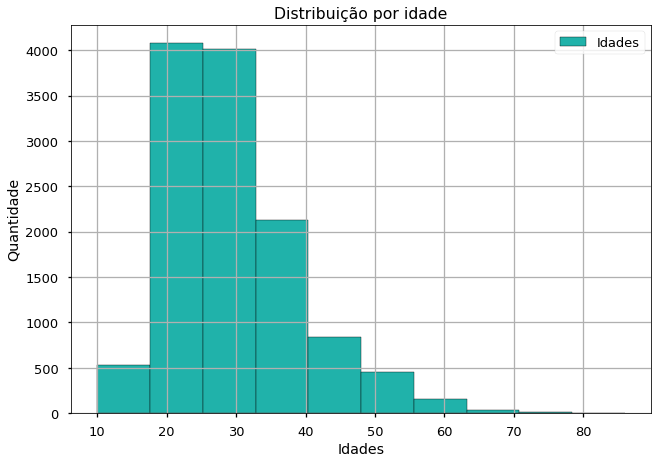

In [ ]:
#histograma

plt.hist(idade, label='Idades', color='lightseagreen', edgecolor = 'black')
plt.title('Distribuição por idade')
plt.xlabel('Idades')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.show()

### Análise de Gênero

In [ ]:
dados.Gender.value_counts()

male           9360
female         2697
genderqueer      65
agender          36
trans            36
Name: Gender, dtype: int64

In [ ]:
dados.Gender.value_counts().sum()

12194

In [ ]:
tipos_de_genero = pd.DataFrame(dados.Gender.value_counts())

In [ ]:
tipos_de_genero.head()

,Gender
male,9360
female,2697
genderqueer,65
agender,36
trans,36


In [ ]:
tipos_de_genero.columns.name = 'Tipo'

In [ ]:
tipos_de_genero.head()

Tipo,Gender
male,9360
female,2697
genderqueer,65
agender,36
trans,36


In [ ]:
tipos_de_genero.iloc[0]

Tipo
Gender    9360
Name: male, dtype: int64

selecionando linha female e tirando a porcentagem

In [ ]:
feminino = tipos_de_genero.iloc[1]
feminino

Tipo
Gender    2697
Name: female, dtype: int64

In [ ]:
total_genero = dados.Gender.value_counts().sum()
total_genero

12194

In [ ]:
fem = (feminino / total_genero * 100)
fem

Tipo
Gender    22.117435
Name: female, dtype: float64

In [ ]:
dados.groupby('Gender').mean() #media da idade por gênero

,Age,JobRelocateYesNo,HoursLearning,MoneyForLearning
Gender,,,,
agender,25.277778,0.642857,13.685714,1023.088235
female,30.797553,0.653043,14.537481,1558.847478
genderqueer,28.215385,0.684211,14.311475,1600.316667
male,29.300000,0.758493,16.066402,1083.079552
trans,30.000000,0.714286,17.828571,3019.588235


In [ ]:
genero = dados.Gender.value_counts()

([<matplotlib.patches.Wedge at 0x7f3623418790>,
 [Text(-0.8195924148082909, 0.7336676860736846, ''),
  Text(0.7931919072339293, -0.7621329269219392, ''),
  Text(1.09840575279812, -0.0592013700854625, ''),
  Text(1.0995742196475298, -0.030602867292558702, ''),
  Text(1.099952689214474, -0.010202033613305905, '')])

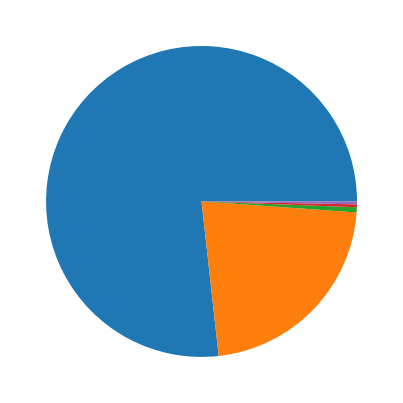

In [ ]:
plt.pie(genero)

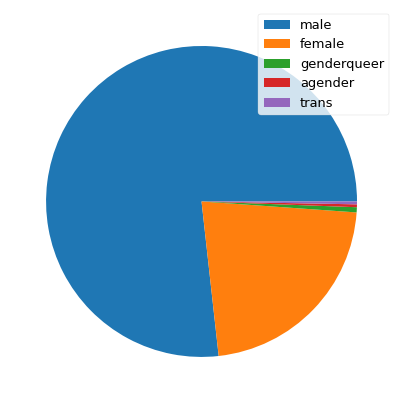

In [ ]:
genero = dados.Gender.value_counts()
plt.pie(genero)
plt.legend(dados.Gender.value_counts().index)
plt.show()

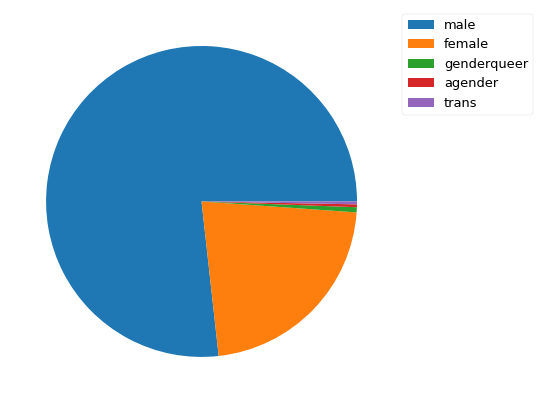

In [ ]:
genero = dados.Gender.value_counts()
plt.pie(genero)
plt.legend(dados.Gender.value_counts().index, bbox_to_anchor = (1,1))
plt.show()

### Distribuição de Interesses

In [ ]:
dados.JobRoleInterest.value_counts()

Full-Stack Web Developer            2211
  Front-End Web Developer           1173
Back-End Web Developer               591
  Data Scientist / Data Engineer     559
  Mobile Developer                   335
  User Experience Designer           235
  DevOps / SysAdmin                  190
  Product Manager                    167
  Quality Assurance Engineer          91
Name: JobRoleInterest, dtype: int64

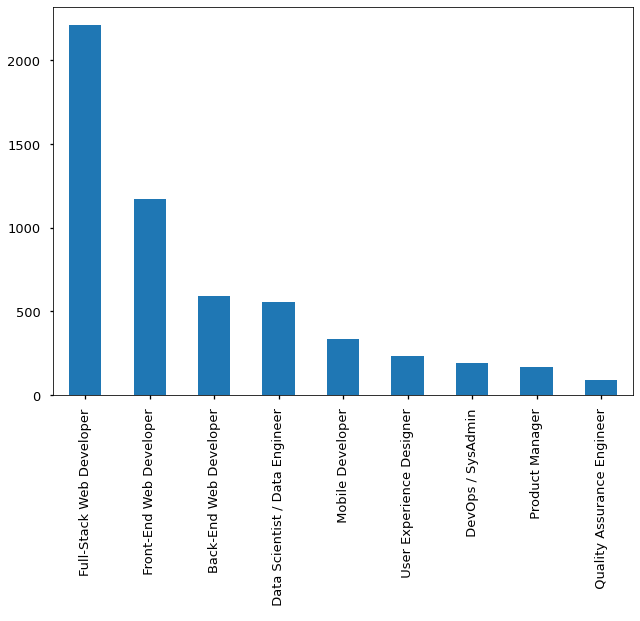

In [ ]:
interesses = dados.JobRoleInterest.value_counts()
interesses.plot(kind = 'bar')

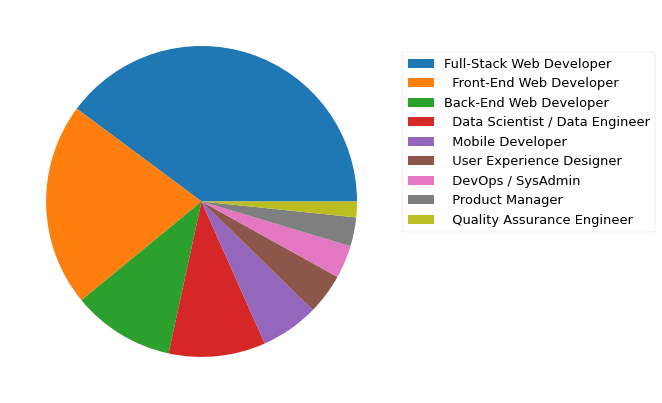

In [ ]:
interesses = dados.JobRoleInterest.value_counts()
plt.pie(interesses)
plt.legend(interesses.index, bbox_to_anchor=(1, 0.9))
plt.show()

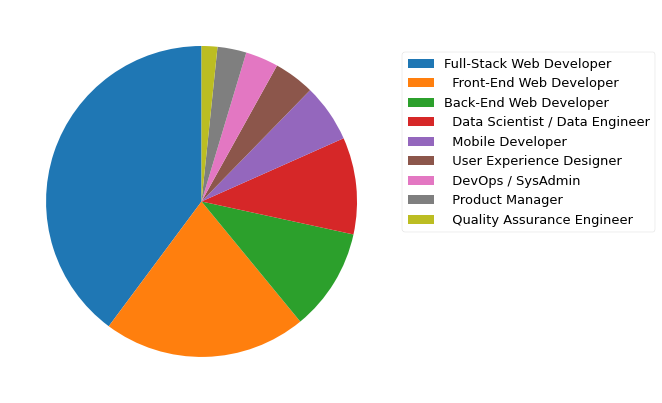

In [ ]:
plt.pie(interesses, startangle = 90)
plt.legend(interesses.index, bbox_to_anchor= (1,0.9))
plt.show()